# Обзор

**Numpy** - python-библиотека для работы с массивами чисел.

*   Обычно импортируется следующим образом: **`import numpy as np`**

Основной объект - **`np.ndarray`**, представляет собой массив чисел.

*   массивы бывают одномерные, двумерные, трехмерные, 4-мерные и т. д.
*   массивы могут содержать целые числа, числа с плавающей запятой, логические значения (True/False) и др.

Пример: пусть у нас есть список (**`list`**) из целых чисел: **`[1, 3, 5, 7, 9]`**.

Функция **`np.array`** преобразует его в одномерный numpy-массив:

In [ ]:
import numpy as np
arr = np.array([1, 3, 5, 7, 9])

print(arr)
print(type(arr))

[1 3 5 7 9]
<class 'numpy.ndarray'>


#Типы данных

Numpy-массив практически всегда имеет определенный тип данных, общий для всего массива.

Конструктор np.array может принимать дополнительный аргумент dtype, в котором явно указан тип массива:

**np.float64** - число с плавающей запятой, занимающее 8 байт

In [ ]:
array = np.array([-1, -0.5, 0, 0.5, 1], dtype=np.float64)
print(f'Массив имеет тип {array.dtype} и значения {array}')

Массив имеет тип float64 и значения [-1.  -0.5  0.   0.5  1. ]


**np.float32** - число с плавающей запятой сокращенной точности, занимающее 4 байта

In [ ]:
array = np.array([-1, -0.5, 0, 0.5, 1], dtype=np.float32)
print(f'Массив имеет тип {array.dtype} и значения {array}')

Массив имеет тип float32 и значения [-1.  -0.5  0.   0.5  1. ]


**np.int64** - целое число, занимающее 8 байт

In [ ]:
array = np.array([0, 0.2, 0.4, 1], dtype=np.int64)
print(f'Массив имеет тип {array.dtype} и значения {array}')

Массив имеет тип int64 и значения [0 0 0 1]


**np.uint8** - целое число, занимающее 1 байт, может принимать значения от 0 до 255

Часто используется для хранения изображений: значения яркости пикселя меняются от 0 до 255.

In [ ]:
array = np.array([0, 100, 255, 256, -1, 999], dtype=np.uint8)
print(f'Массив имеет тип {array.dtype} и значения {array}')

Массив имеет тип uint8 и значения [  0 100 255   0 255 231]


**bool** (то же, что **np.bool_**) - логические значения True или False

In [ ]:
array = np.array([True, False, 10, -10], dtype=bool)
print(f'Массив имеет тип {array.dtype} и значения {array}')

Массив имеет тип bool и значения [ True False  True  True]


**object** - произвольные python-объекты (используется редко)

In [ ]:
array = np.array([0, 1, None, 'abc'])
print(f'Массив имеет тип {array.dtype} и значения {array}')

Массив имеет тип object и значения [0 1 None 'abc']


Есть и [другие типы чисел](https://numpy.org/devdocs/user/basics.types.html), отличающиеся размером в байтах и наличием знака.

Типы можно преобразовывать командой **astype**:

In [ ]:
array = np.array([0, 1, 2])
print(f'Массив имеет тип {array.dtype} и значения {array}')

array2 = array.astype(float)
print(f'Массив имеет тип {array2.dtype} и значения {array2}')

Массив имеет тип int64 и значения [0 1 2]
Массив имеет тип float64 и значения [0. 1. 2.]


Важно что исходный массив при этом не меняется, создается копия массива с новым типом.

# Одномерные массивы

Основные способы хранения одномерных массивов в python:
*   Кортеж (tuple)
*   Список (list)
*   numpy-массив

В чем отличия?

**Отличие 1.** Кортежи и списки не имеют никаких ограничений на тип хранимых данных:

In [ ]:
(1, 2.0, None, 'abc') #кортеж
[1, 2.0, None, 'abc']; #список

Тогда как numpy-массивы всегда имеют определенный тип.

**Отличие 2.** В кортежах, в отличие от списков, нельзя заменять элементы:

In [ ]:
data = (1, 2, 3)
data[0] = 1 #Ошибка: 'tuple' object does not support item assignment

In [ ]:
import numpy as np
tmp = np.array([1,2,3,False,'asdadf', {'a':1}])
for i in range(len(tmp)):
    print(type(tmp[i]))
tmp 


**Отличие 3.** Кортежи и списки складываются конкатенацией (склейкой), numpy-массивы складываются поэлементно:

In [ ]:
(1, 2, 3) + (4, 5, 6)

(1, 2, 3, 4, 5, 6)

In [ ]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [ ]:
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

Кортежи и списки тоже можно сложить поэлементно, но синтаксис сложнее:

In [ ]:
arr1 = [1, 2, 3]
arr2 = [4, 5, 6]
[x+y for x, y in zip(arr1, arr2)]

[5, 7, 9]

В свою очередь, numpy массивы тоже можно склеить, но синтаксис сложнее:

In [ ]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
np.concatenate([arr1, arr2])

array([1, 2, 3, 4, 5, 6])

**Отличие 4.** Numpy-массивы обеспечивают большую производительность операций.

Для проверки посчитаем время, затрачиваемое на подсчет суммы в массиве из 100 миллионов чисел:

In [ ]:
size = int(1e8)
array = [0.0] * size
%time sum(array)

CPU times: user 499 ms, sys: 4.23 ms, total: 503 ms
Wall time: 502 ms


0.0

In [ ]:
array = np.zeros(size, dtype=float)
%time array.sum()

CPU times: user 70.1 ms, sys: 35 µs, total: 70.1 ms
Wall time: 70.2 ms


0.0

Ускорение достигается за счет того, что numpy использует для расчетов код, написанный на языке C.

# Способы создания массивов

Все функции ниже пригодны и для создания многомерных массивов, поэтому мы будем рассматривать их еще раз позже.

In [ ]:
#@title Способы создания массивов

%%html
<style>
    p, table {
        font-size: 18px;
    }
</style>

<table width="90%" border=1>

<tr>
<th width="20%" style="text-align:left">Операция</th>
<th width="30%" style="text-align:left">Пояснение</th>
<th width="25%" style="text-align:left">Пример</th>
<th width="35%" style="text-align:left">Результат</th>
</tr>

<tr>
<td>np.array(list)</td>
<td>Создание массива из списка, последовательности и некоторых других объектов, которые могут быть преобразованы в массив (например, PIL-изображения, пока их не рассматриваем)</td>
<td>np.array([7, 2, 8])<br/>np.array(range(5))</td>
<td>[7, 2, 8]<br/>[0, 1, 2, 3, 4]</td>
</tr>

<tr>
<td>np.zeros(size)</td>
<td>Создание массива из нулей</td>
<td>np.zeros(5)</td>
<td>[0.0, 0.0, 0.0, 0.0, 0.0]</td>
</tr>

<tr>
<td>np.ones(size)</td>
<td>Создание массива из единиц</td>
<td>np.ones(5)<br/>(аналогично np.zeros(5) + 1)</td>
<td>[1.0, 1.0, 1.0, 1.0, 1.0]</td>
</tr>

<tr>
<td>np.random.rand(size)</td>
<td>Создание массива из cлучайных чисел от 0 до 1</td>
<td>np.random.rand(5)</td>
<td>[0.660, 0.633, 0.547, 0.782, 0.905]</td>
</tr>

<tr>
<td>np.random.uniform(A, B, size)</td>
<td>Создание массива из cлучайных float-чисел от A до B размера size</td>
<td>np.random.uniform(-100, 100, 5)</td>
<td>[22.17, 92.07, 99.24, -11.12, -82.85]</td>
</tr>

<tr>
<td>np.random.normal(size=size)</td>
<td>Создание массива из нормально распределенных случайных значений</td>
<td>np.random.normal(size=5)</td>
<td>[-1.017, 1.122, -0.685, 0.096, -0.206]</td>
</tr>

<tr>
<td>np.random.randint(A, B, size)</td>
<td>Создание массива из случайных целых чисел от A включительно до B невключительно размера size</td>
<td>np.random.randint(0, 1000, 5)</td>
<td>[316, 989, 415, 605, 101]</td>
</tr>

<tr>
<td>np.arange(size)</td>
<td>Создание массива от 0 до size</td>
<td>np.arange(5)<br/>(аналогично np.array(range(5)))</td>
<td>[0, 1, 2, 3, 4]</td>
</tr>

<tr>
<td>np.linspace(A, B, size, endpoint=True)</td>
<td>Создание массива чисел от A до В (включительно если endpoint равно True), распределенных равномерно на данном интервале</td>
<td>np.linspace(-1, 1, 3)<br/>np.linspace(-1, 1, 5)<br/>np.linspace(-1, 1, 5, endpoint=False)<br/>(аналогично np.linspace(-1, 1, 6)[:-1])</td>
<td>[-1.0, 0.0, 1.0]<br/>[-1.0, -0.5, 0.0, 0.5, 1.0]<br/>[-1.0, -0.6, -0.2, 0.2, 0.6]<br/>.</td>
</tr>

</table>

# Основные операции с массивами

Арифметические операции между двумя массивами осуществляются попарно:

In [ ]:
array1 = np.array([-1, 0, 1, 2])
array2 = np.array([0, 4, 7, 0])

In [ ]:
array1 + array2

array([-1,  4,  8,  2])

In [ ]:
array1 - array2

array([-1, -4, -6,  2])

In [ ]:
array1 * array2

array([0, 0, 7, 0])

In [ ]:
array1 / array2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.14285714,        inf])

В последнем случае происходит деление на 0, при этом выдается предупреждение.

*   Ноль деленый на ноль дает NaN (неопределенность)
*   Положительное число, деленое на 0, дает Inf (плюс бесконечность)
*   Отрицательное число, деленое на 0, дает -Inf (минус бесконечность)

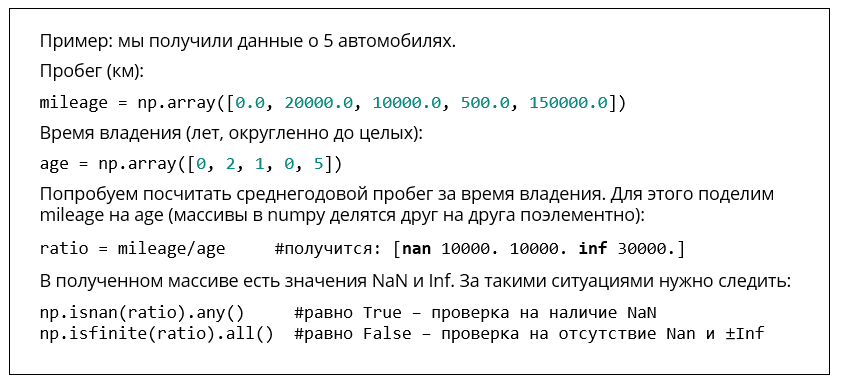

Арифметические операции между массивом и числом осуществляются между числом и каждым элементом массива:

In [ ]:
np.array([1, 2, 3]) + 0.5

array([1.5, 2.5, 3.5])

In [ ]:
-2 * np.array([1, 2, 3])

array([-2, -4, -6])

Элемент массива можно получить или изменить, используя квадратные скобки:

In [ ]:
array = np.array([1, 2, 3])
array[0] = 17
print(array)

[17  2  3]


Numpy поддерживает много математических операций, применяемых поэлементно к каждому элементу массива:

*   **np.abs** (модуль)
*   **np.sin** (синус)
*   **np.sqrt** (квадратный корень)
*   ...и другие


# Рисование графиков с помощью matplotlib

Мы не будем рассматривать matplotlib подробно, рассмотрим только функции **plot**, **scatter** и (в следующей части) **imshow**.

Если в plot передается один аргумент, то он интерпретируется как значения оси Y, а по оси X откладывается номер элемента в массиве

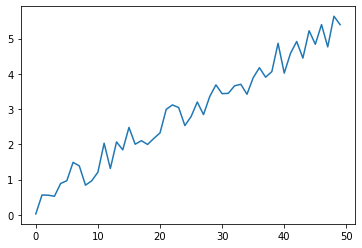

In [ ]:
import matplotlib.pyplot as plt
data = np.random.rand(50) #50 случайных чисел
data2 = np.arange(50) / 10 #возрастающие числа от 0 до 5
plt.plot(data + data2);

In [ ]:
data2 + data

array([0.02685398, 0.56328249, 0.55837304, 0.52744645, 0.88949993,
       0.97034173, 1.48914619, 1.39000207, 0.84278469, 0.96526654,
       1.21163365, 2.03231354, 1.31477885, 2.06930361, 1.84505163,
       2.48066111, 2.00414288, 2.10360266, 1.99787696, 2.16877476,
       2.32529431, 2.99386098, 3.11921372, 3.04487181, 2.53353797,
       2.78785346, 3.20137214, 2.84482522, 3.35566619, 3.68797624,
       3.43768963, 3.44819795, 3.66043051, 3.70516057, 3.42249109,
       3.88998702, 4.17432589, 3.90520421, 4.06352943, 4.86798565,
       4.02090374, 4.58014474, 4.91774415, 4.4482303 , 5.2247689 ,
       4.84025502, 5.39670119, 4.76528839, 5.63469748, 5.3956154 ])

Чтобы нарисовать график математической функции, нужно определить набор значений на оси X, для которых мы будем рассчитывать значение Y. Для этого используем **np.linspace**. При этом **plot** принимает 2 аргумента: значения X и значения Y.

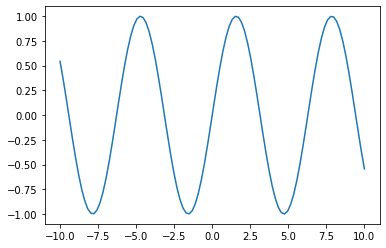

In [ ]:
X = np.linspace(-10, 10, num=100) #100 чисел, равномерно возрастающих от -10 до 10 включительно
Y = np.sin(X) #100 значений Y
plt.plot(X, Y);

In [ ]:
X

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

Функция scatter напоминает plot, но рисует точки вместо линий.

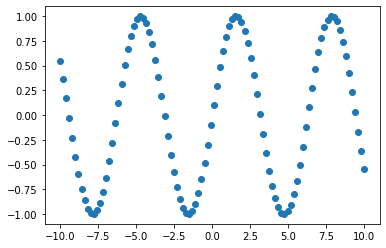

In [ ]:
plt.scatter(X, Y);

Значения массива X в функциях plot и scatter не обязаны возрастать!

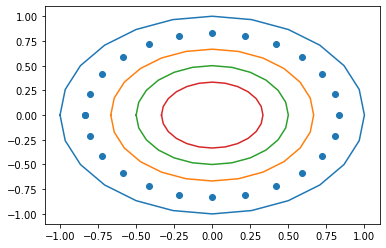

In [ ]:
angle = np.linspace(-np.pi, np.pi, num=25)
X = np.cos(angle)
Y = np.sin(angle)
plt.plot(X, Y)
plt.scatter(X / 1.2, Y / 1.2)
plt.plot(X / 1.5, Y / 1.5) #рисуем на том же графике 2-й plot, он рисуется другим цветом (всего цветов 10)
plt.plot(X / 2, Y / 2)
plt.plot(X / 3, Y / 3);

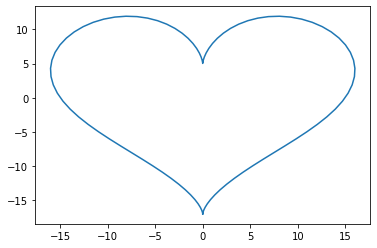

In [ ]:
t = np.linspace(-np.pi, np.pi, num=100)
X = 16*np.sin(t)**3
Y = 13*np.cos(t)-5*np.cos(2*t)-2*np.cos(3*t)-np.cos(4*t)
plt.plot(X, Y);

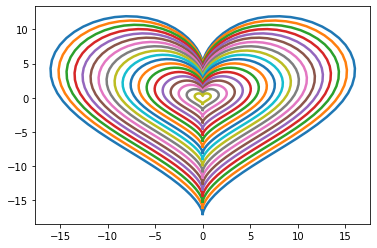

In [ ]:
for i in np.linspace(1, 0, num=20):
  plt.plot(X*i, Y*i, linewidth=2.5)